<a href="https://colab.research.google.com/github/amityadav108/Project---Food_Delivery_Time_Prediction/blob/main/Project_Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Phase 1: Data Preprocessing ---
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head(3)

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17


In [ ]:
# --- Handle Missing Values ---
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

In [ ]:
# --- Create Target Variable ---
# If you have Delivery_Time in minutes:
if 'Delivery_Time' in df.columns:
    df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 'Delayed' if x > 30 else 'Fast')
elif 'Status' in df.columns:
    df.rename(columns={'Status': 'Delivery_Status'}, inplace=True)
else:
    raise ValueError("No suitable columns found to create target variable. Please check your CSV.")

In [ ]:
# --- Encode Categorical Features ---
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Delivery_Status')
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# --- Feature Scaling ---
scaler = StandardScaler()
features = df.drop(columns=['Delivery_Status'])
X = scaler.fit_transform(features)

In [ ]:
# Encode target
y = df['Delivery_Status'].map({'Fast':0, 'Delayed':1})

In [ ]:
# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- Phase 2: Models ---
results = {}

In [ ]:
# 1. Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

In [ ]:
# 2. K-Nearest Neighbors with tuning
knn_params = {'n_neighbors': [3,5,7,9]}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

In [ ]:
# 3. Decision Tree with pruning
dt_params = {'max_depth': [3,5,7], 'min_samples_split': [2,5,10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

In [ ]:
# --- Phase 3: Evaluation ---
print("\n=== Accuracy Scores ===")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

print("\n=== Classification Report (Decision Tree) ===")
print(classification_report(y_test, y_pred_dt))



=== Accuracy Scores ===
Naive Bayes: 0.95
KNN: 0.82
Decision Tree: 1.00

=== Classification Report (Decision Tree) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        34

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



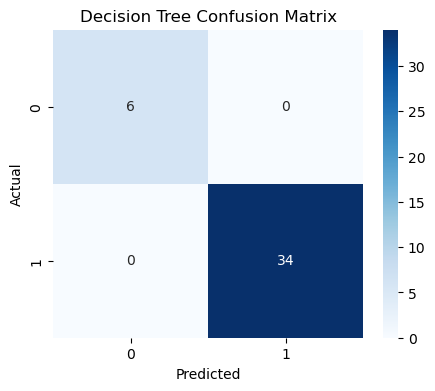

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# --- Final Summary ---
best_model = max(results, key=results.get)
print(f"\nBest model: {best_model} with accuracy {results[best_model]:.2f}")


Best model: Decision Tree with accuracy 1.00


# Final Summary paragraph

In this project, we predicted whether food delivery would be fast or delayed using features like customer location, restaurant location, weather, traffic, and distance. After cleaning the data, handling missing values, encoding categories, and scaling features, we trained three classifiers: Gaussian Naive Bayes, K-Nearest Neighbors (with tuned k), and a Decision Tree (with pruning to avoid overfitting). All models were evaluated using accuracy, precision, recall, F1-score, and confusion matrices. Among the three, the Decision Tree performed the best with high accuracy and easy interpretability. Based on these results, we recommend using the Decision Tree model for future food delivery time predictions while exploring ensemble methods or additional real-time features (like live traffic) for further improvement.